# Kaggle (Categorization)

1. Jordan Adelphi. (2023). Navigating Financial Instability (Categorization). Kaggle. https://kaggle.com/competitions/navigating-financial-instability

2. Jordan Adelphi. (2023). Navigating Financial Instability (Regression). Kaggle. https://kaggle.com/competitions/navigating-financial-instability-regression

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [4]:
df_test = pd.read_parquet("C:/Users/colet/Documents/Adelphi MABA/783 Advanced Business Analytics/20231124_Financial_Risk_Project_test_public.parquet")
df_train = pd.read_parquet("C:/Users/colet/Documents/Adelphi MABA/783 Advanced Business Analytics/20231124_Financial_Risk_Project_train.parquet")

df_train.shape, df_test.shape

((415, 73), (104, 71))

EDA of Financial Sector


In [6]:
# Check basic information
print(df_train.info())
print(df_train.describe())
print(df_train.head())

<class 'pandas.core.frame.DataFrame'>
Index: 415 entries, FICO to GBCI
Data columns (total 73 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   url                                   415 non-null    object 
 1   call_transcript                       415 non-null    object 
 2   VWAP                                  415 non-null    float64
 3   exchangeCountry                       415 non-null    object 
 4   securityType                          415 non-null    object 
 5   CIK                                   415 non-null    object 
 6   name                                  415 non-null    object 
 7   securityID                            415 non-null    int64  
 8   incorporationCountry                  415 non-null    object 
 9   exchangeName                          415 non-null    object 
 10  exchangeID                            412 non-null    object 
 11  Accrual Ratio       

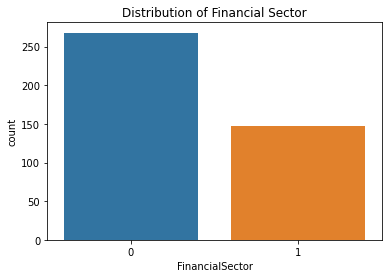

In [7]:
# Visualize the distribution of the target variable
sns.countplot(x='FinancialSector', data=df_train)
plt.title('Distribution of Financial Sector')
plt.show()

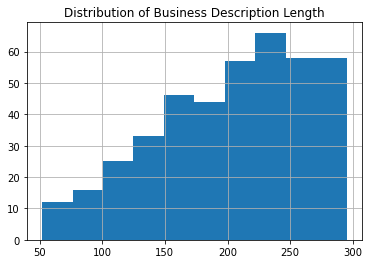

In [8]:
# Analyze text feature
df_train['businessDescription'].str.len().hist()
plt.title('Distribution of Business Description Length')
plt.show()

Feature Selection

In [9]:
# Assuming df_train is your training dataset

# Select relevant features for analysis
selected_features = [
    'VWAP', 'Accrual Ratio', 'B/P', 'CF/P', 'Capital Expenditure', 'Cash', 'Debt/Equity', 'Depreciation',
    'Dividend', 'E/P', 'EBIT', 'EBIT/P', 'EBIT/TEV', 'Earnings','Earnings Growth (1Y)','Earnings Growth (2Y)','Earnings Growth (3Y)', 'Earnings Growth (4Y)', 'Earnings Growth (5Y)', 'Earnings Variability',
    'Equity', 'FCF', 'FCF/P', 'Income Tax', 'Interest Expense', 'Long Liabilities', 'Long Term Debt', 'Market Cap',
    'Operating Cash Flow', 'Operating Expense', 'Operating Income', 'Operating Income Before Depreciation',
    'Operating Margin', 'Profit Margin', 'R&D', 'ROA', 'ROE', 'S/P', 'SG&A', 'Sales', 'Sales Growth (1Y)','Sales Growth (2Y)','Sales Growth (3Y)', 'Sales Growth (4Y)', 'Sales Growth (5Y)',
    'Sales Variability', 'Short Term Debt', 'TEV', 'Working Capital'
]

# Extract selected features in the training set
df_train_selected = df_train[selected_features + ['FinancialSector']]

# Handle missing values with imputation
numeric_imputer = SimpleImputer(strategy='mean')
df_train_selected[selected_features] = numeric_imputer.fit_transform(df_train_selected[selected_features])

# Separate features and target variable
X_train = df_train_selected[selected_features]
y_train = df_train_selected['FinancialSector']

# Standardize numeric features
scaler = StandardScaler()
X_train[selected_features] = scaler.fit_transform(X_train[selected_features])

# Select K best features based on correlation with the target variable
selector = SelectKBest(score_func=f_regression, k=15)  # You can adjust the value of k as needed
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_feature_names = X_train.columns[selector.get_support()]

# Train a model to see feature importance
model = RandomForestRegressor(random_state=42)
model.fit(X_train_selected, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': selected_feature_names, 'Importance': feature_importances})

# Display or save the feature importance DataFrame
print(feature_importance_df)


C:\Users\colet\AppData\Local\Temp\ipykernel_28728\3921763140.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_selected[selected_features] = numeric_imputer.fit_transform(df_train_selected[selected_features])
C:\Users\colet\AppData\Local\Temp\ipykernel_28728\3921763140.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[selected_features] = scaler.fit_transform(X_train[selected_features])


                 Feature  Importance
0                    B/P    0.014371
1                   CF/P    0.016333
2    Capital Expenditure    0.040841
3           Depreciation    0.108493
4   Earnings Growth (3Y)    0.022311
5   Earnings Growth (5Y)    0.012899
6                  FCF/P    0.011037
7       Long Liabilities    0.362171
8      Operating Expense    0.042569
9                    R&D    0.006208
10                  SG&A    0.117956
11                 Sales    0.018740
12     Sales Growth (4Y)    0.013936
13       Short Term Debt    0.014845
14       Working Capital    0.197290


Classification

In [10]:
# Select features; will be using all features with .1 or higher importance score as well as businessDescription
#Feature Selection

selected_features = ['businessDescription', 'Depreciation', 'Long Liabilities', 'SG&A', 'Working Capital']

# Create feature matrix and target variable
X_train = df_train[selected_features]
y_train = df_train['FinancialSector']
X_test = df_test[selected_features]


In [11]:
# Text feature processing
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_text = vectorizer.fit_transform(X_train['businessDescription'])
X_test_text = vectorizer.transform(X_test['businessDescription'])


In [12]:
# Combine features
X_train_combined = hstack([X_train_text, X_train.drop('businessDescription', axis=1)])
X_test_combined = hstack([X_test_text, X_test.drop('businessDescription', axis=1)])


In [13]:
# Split the training data for validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_combined, y_train, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_split, y_train_split)

# Validate the model
val_predictions = clf.predict(X_val_split)
accuracy = accuracy_score(y_val_split, val_predictions)
print(f'Validation Accuracy: {accuracy}')


Validation Accuracy: 0.963855421686747


In [14]:
# Make predictions on the test set
test_predictions = clf.predict(X_test_combined)

# Assign predictions to the test dataset
df_test['FinancialSector'] = test_predictions


In [15]:
df_test_dropcall = df_test.drop('call_transcript', axis=1)
df_test_dropcall.to_csv('Classification_try2.csv', index=True)

Fine Tuning Hyper Paremeters

Using Grid Search

In [16]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the grid search model
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,  # Adjust the number of folds as needed
                           scoring='accuracy',
                           verbose=2,
                           n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_combined, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [17]:
best_params = grid_search.best_params_

final_model = RandomForestClassifier(random_state=42, **best_params)
final_model.fit(X_train_combined, y_train)

# Make predictions on the test set
test_predictions = final_model.predict(X_test_combined)

# Assign predictions to the test dataset
df_test['FinancialSector'] = test_predictions


In [18]:
df_test_dropcall = df_test.drop('call_transcript', axis=1)
df_test_dropcall.to_csv('Classification_gridsearch.csv', index=True)

Model Assessment

In [19]:
# the true labels for the test set in y_test
y_test = df_test['FinancialSector']

# Calculate predictions
test_predictions = final_model.predict(X_test_combined)

# Evaluate accuracy
accuracy = accuracy_score(y_test, test_predictions)
print(f"Accuracy: {accuracy:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, test_predictions))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        45

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104


Confusion Matrix:
[[59  0]
 [ 0 45]]


Moving into Kaggle Regression Competition

EDA of Financial Risk

In [20]:
# Display basic statistics of 'FinancialRisk'
print(df_train['FinancialRisk'].describe())

count    415.000000
mean       0.049077
std        0.117747
min       -0.102909
25%        0.000000
50%        0.000000
75%        0.060544
max        0.998330
Name: FinancialRisk, dtype: float64


In [21]:
# Check for class imbalance
class_counts = df_train['FinancialRisk'].value_counts()
print('Class Counts:\n', class_counts)

Class Counts:
  0.000000    268
 0.196409      1
 0.052267      1
-0.014358      1
 0.094662      1
            ... 
 0.341410      1
 0.175727      1
 0.065527      1
 0.202973      1
 0.089905      1
Name: FinancialRisk, Length: 148, dtype: int64


Feature Selection

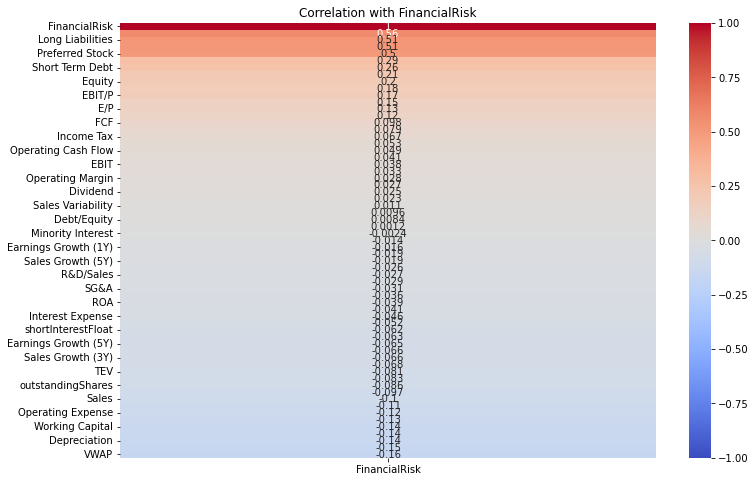

In [22]:
# Visualize the correlation between 'FinancialRisk' and other numeric features
plt.figure(figsize=(12, 8))
sns.heatmap(df_train.corr()[['FinancialRisk']].sort_values(by='FinancialRisk', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with FinancialRisk')
plt.show()

In [23]:
# Assuming df_train is your training dataset

# Select relevant features for analysis
selected_features = [
    'VWAP', 'Accrual Ratio', 'B/P', 'CF/P', 'Capital Expenditure', 'Cash', 'Debt/Equity', 'Depreciation',
    'Dividend', 'E/P', 'EBIT', 'EBIT/P', 'EBIT/TEV', 'Earnings','Earnings Growth (1Y)','Earnings Growth (2Y)','Earnings Growth (3Y)', 'Earnings Growth (4Y)', 'Earnings Growth (5Y)', 'Earnings Variability',
    'Equity', 'FCF', 'FCF/P', 'Income Tax', 'Interest Expense', 'Long Liabilities', 'Long Term Debt', 'Market Cap',
    'Operating Cash Flow', 'Operating Expense', 'Operating Income', 'Operating Income Before Depreciation',
    'Operating Margin', 'Profit Margin', 'R&D', 'ROA', 'ROE', 'S/P', 'SG&A', 'Sales', 'Sales Growth (1Y)','Sales Growth (2Y)','Sales Growth (3Y)', 'Sales Growth (4Y)', 'Sales Growth (5Y)',
    'Sales Variability', 'Short Term Debt', 'TEV', 'Working Capital'
]

# Extract selected features in the training set
df_train_selected = df_train[selected_features + ['FinancialRisk']]

# Handle missing values with imputation
numeric_imputer = SimpleImputer(strategy='mean')
df_train_selected[selected_features] = numeric_imputer.fit_transform(df_train_selected[selected_features])

# Separate features and target variable
X_train = df_train_selected[selected_features]
y_train = df_train_selected['FinancialRisk']

# Standardize numeric features
scaler = StandardScaler()
X_train[selected_features] = scaler.fit_transform(X_train[selected_features])

# Select K best features based on correlation with the target variable
selector = SelectKBest(score_func=f_regression, k=15)  # You can adjust the value of k as needed
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_feature_names = X_train.columns[selector.get_support()]

# Train a model to see feature importance
model = RandomForestRegressor(random_state=42)
model.fit(X_train_selected, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': selected_feature_names, 'Importance': feature_importances})

# Display or save the feature importance DataFrame
print(feature_importance_df)


C:\Users\colet\AppData\Local\Temp\ipykernel_28728\3888365584.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_selected[selected_features] = numeric_imputer.fit_transform(df_train_selected[selected_features])
C:\Users\colet\AppData\Local\Temp\ipykernel_28728\3888365584.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[selected_features] = scaler.fit_transform(X_train[selected_features])


                Feature  Importance
0                  VWAP    0.340014
1                   B/P    0.013030
2                  CF/P    0.015685
3   Capital Expenditure    0.025541
4                  Cash    0.015220
5          Depreciation    0.048214
6                   E/P    0.021737
7                EBIT/P    0.013120
8              EBIT/TEV    0.030090
9                Equity    0.033188
10                FCF/P    0.019405
11     Long Liabilities    0.332712
12                  R&D    0.000113
13      Short Term Debt    0.072800
14      Working Capital    0.019129


Running Regression with RandomForest

In [24]:
# Assuming df_train contains the target variable 'FinancialRisk'
# and df_test is missing the 'FinancialRisk' column

# Selecting features with moderate or higher importance scores
selected_features = ['VWAP', 'Long Liabilities', 'Short Term Debt']

# Concatenating selected features with additional necessary columns
selected_features = ['FinancialSector'] + selected_features
df_train_selected = df_train[selected_features + ['FinancialRisk']].copy()
df_test_selected = df_test[selected_features].copy()

# Handling missing values using SimpleImputer
numeric_imputer = SimpleImputer(strategy='mean')
df_train_selected[selected_features] = numeric_imputer.fit_transform(df_train_selected[selected_features])
df_test_selected[selected_features] = numeric_imputer.transform(df_test_selected[selected_features])

# Standardizing numeric features using StandardScaler
scaler = StandardScaler()
df_train_selected[selected_features] = scaler.fit_transform(df_train_selected[selected_features])
df_test_selected[selected_features] = scaler.transform(df_test_selected[selected_features])

# Extracting features and target variable
X_train = df_train_selected[selected_features]
y_train = df_train_selected['FinancialRisk']
X_test = df_test_selected[selected_features]

# Train a RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
test_predictions = model.predict(X_test)

# Set FinancialRisk to 0 for companies not in the financial sector
test_predictions[df_test['FinancialSector'] == 0] = 0

# Assigning risk score between 0 and 1
test_predictions = test_predictions.clip(0, 1)

# Assigning risk score between 0 and 1
df_test['FinancialRisk'] = test_predictions

# Display or save the updated df_test with the predicted 'FinancialRisk' column
print(df_test[['FinancialSector', 'FinancialRisk']])

# Evaluate the model performance
mse = mean_squared_error(y_train, model.predict(X_train))
r2 = r2_score(y_train, model.predict(X_train))
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print(f'Mean Squared Error on Training Set: {mse}')
print(f'R-squared on Training Set: {r2}')
print(f'Cross-validated R-squared scores: {cv_scores}')


        FinancialSector  FinancialRisk
ticker                                
JAZZ                  0       0.000000
WAL                   1       0.335520
PGR                   1       0.053290
ARES                  1       0.055076
CBSH                  1       0.099922
...                 ...            ...
CMCSA                 0       0.000000
PNNT                  1       0.050070
ORLY                  0       0.000000
PRI                   1       0.004465
FIVE                  0       0.000000

[104 rows x 2 columns]
Mean Squared Error on Training Set: 0.0005657044875897339
R-squared on Training Set: 0.959098536487506
Cross-validated R-squared scores: [0.79527902 0.77992084 0.78959127 0.6262989  0.63606547]


In [25]:
df_test_dropcall = df_test.drop('call_transcript', axis=1)
df_test_dropcall.to_csv('Regression_Random_Forest.csv', index=True)

Running Regression with XGboost

In [26]:
# Assuming df_train contains the target variable 'FinancialRisk'
# and df_test is missing the 'FinancialRisk' column

# Selecting features with moderate or higher importance scores
selected_features = ['VWAP','Long Liabilities', 'Short Term Debt', 'Preferred Stock', 'Depreciation']

# Concatenating selected features with additional necessary columns
selected_features = ['FinancialSector'] + selected_features
df_train_selected = df_train[selected_features + ['FinancialRisk']].copy()
df_test_selected = df_test[selected_features].copy()

# Handling missing values using SimpleImputer
numeric_imputer = SimpleImputer(strategy='mean')
df_train_selected[selected_features] = numeric_imputer.fit_transform(df_train_selected[selected_features])
df_test_selected[selected_features] = numeric_imputer.transform(df_test_selected[selected_features])

# Standardizing numeric features using StandardScaler
scaler = StandardScaler()
df_train_selected[selected_features] = scaler.fit_transform(df_train_selected[selected_features])
df_test_selected[selected_features] = scaler.transform(df_test_selected[selected_features])

# Extracting features and target variable
X_train = df_train_selected[selected_features]
y_train = df_train_selected['FinancialRisk']
X_test = df_test_selected[selected_features]


# Step 4: Model Selection
model = xgb.XGBRegressor(random_state=42)

# Step 5: Model Training
model.fit(X_train, y_train)

# Use the trained model to predict the 'FinancialRisk' for df_test
test_predictions = model.predict(X_test)

# Set FinancialRisk to 0 for companies not in the financial sector
test_predictions[df_test['FinancialSector'] == 0] = 0

# Assigning risk score between 0 and 1
test_predictions = test_predictions.clip(0, 1)

# Append the modified 'FinancialRisk' column to df_test
df_test['FinancialRisk'] = test_predictions

# Display or save the updated df_test with the corrected 'FinancialRisk' column
print(df_test[['FinancialSector', 'FinancialRisk']])

        FinancialSector  FinancialRisk
ticker                                
JAZZ                  0       0.000000
WAL                   1       0.342995
PGR                   1       0.051191
ARES                  1       0.029500
CBSH                  1       0.075389
...                 ...            ...
CMCSA                 0       0.000000
PNNT                  1       0.089314
ORLY                  0       0.000000
PRI                   1       0.049440
FIVE                  0       0.000000

[104 rows x 2 columns]


In [27]:
# Evaluate the model performance
mse = mean_squared_error(y_train, model.predict(X_train))
r2 = r2_score(y_train, model.predict(X_train))
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print(f'Mean Squared Error on Training Set: {mse}')
print(f'R-squared on Training Set: {r2}')
print(f'Cross-validated R-squared scores: {cv_scores}')



Mean Squared Error on Training Set: 1.563896125311481e-06
R-squared on Training Set: 0.9998869274652933
Cross-validated R-squared scores: [ 0.80250884  0.68299629 -0.07099195  0.64035958  0.72883854]


In [28]:
df_test_dropcall = df_test.drop('call_transcript', axis=1)
df_test_dropcall.to_csv('Regression_XGBoost.csv', index=True)

Fine tuning XGBoost HyperParameters

In [29]:
# Step 4: Model Selection
model = xgb.XGBRegressor(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
}

# Step 5: Hyperparameter Tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to predict the 'FinancialRisk' for df_test
best_model = grid_search.best_estimator_
test_predictions = best_model.predict(X_test)

# Set FinancialRisk to 0 for companies not in the financial sector
test_predictions[df_test['FinancialSector'] == 0] = 0

# Assigning risk score between 0 and 1
test_predictions = test_predictions.clip(0, 1)

# Append the modified 'FinancialRisk' column to df_test
df_test['FinancialRisk'] = test_predictions

# Display or save the updated df_test with the corrected 'FinancialRisk' column
print(df_test[['FinancialSector', 'FinancialRisk']])

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8}
        FinancialSector  FinancialRisk
ticker                                
JAZZ                  0       0.000000
WAL                   1       0.338087
PGR                   1       0.052010
ARES                  1       0.068290
CBSH                  1       0.089954
...                 ...            ...
CMCSA                 0       0.000000
PNNT                  1       0.041199
ORLY                  0       0.000000
PRI                   1       0.042566
FIVE                  0       0.000000

[104 rows x 2 columns]


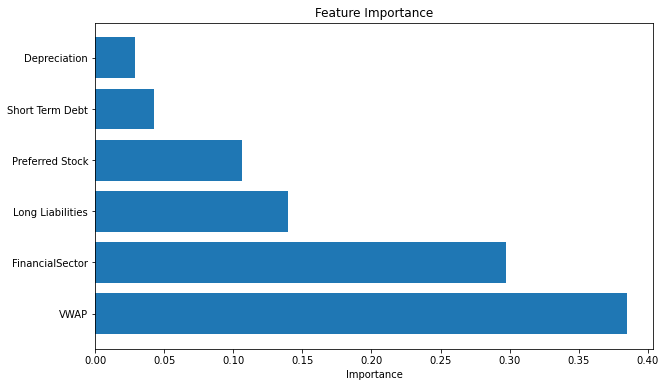

In [30]:
# Analyze feature importance
feature_importances = best_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the top features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [31]:
feature_importance_df.head()

,Feature,Importance
1,VWAP,0.384558
0,FinancialSector,0.297316
2,Long Liabilities,0.139635
4,Preferred Stock,0.106681
3,Short Term Debt,0.042900


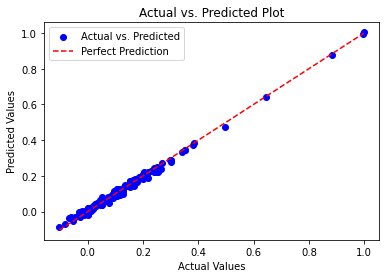

In [32]:
# Assuming y_train is a pandas Series or NumPy array
actual_values = y_train
predicted_values = best_model.predict(X_train)

plt.scatter(actual_values, predicted_values, c='blue', label='Actual vs. Predicted')
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Plot')
plt.legend()
plt.show()


In [33]:
# Evaluate the model performance
mse = mean_squared_error(y_train, best_model.predict(X_train))
r2 = r2_score(y_train, best_model.predict(X_train))
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)

print(f'Mean Squared Error on Training Set: {mse}')
print(f'R-squared on Training Set: {r2}')
print(f'Cross-validated R-squared scores: {cv_scores}')



Mean Squared Error on Training Set: 6.870855495102617e-05
R-squared on Training Set: 0.9950322464909211
Cross-validated R-squared scores: [0.78332276 0.79347186 0.30333981 0.65437315 0.63586641]


In [34]:
df_test_dropcall = df_test.drop('call_transcript', axis=1)
df_test_dropcall.to_csv('Regression_XGBoost_FineTuned2.csv', index=True)